# Analyse exploratoire du jeu de données BRFSS 2015 — Diabète

Le fichier `diabetes_binary_health_indicators_BRFSS2015.csv` est un jeu de données
on peut lire sur kaggle qu'il est propre ( même si l'on vérifiera ça par la suite)
et contenant **253 680 réponses** à l'enquête BRFSS2015.  
La variable cible `Diabetes_binary` comporte deux classes :  
- `0` : absence de diabète  
- `1` : prédiabète ou diabète.  
Le jeu de données comprend **21 variables explicatives**.


L'on va se servir des objectifs et questions soulevés par les experts qui ont mené cette étude 
afin d'orienter notre approche, leur questions sont les suivantes : 

1) Les questions de l'enquête BRFSS permettent-elles de prédire avec précision si une personne est atteinte de diabète ?

2) Quels sont les facteurs de risque les plus prédictifs du risque de diabète ?

3) Peut-on utiliser un sous-ensemble de facteurs de risque pour prédire avec 
   précision si un individu est atteint de diabète ?

4) Peut-on créer une version abrégée des questions du BRFSS 
   en utilisant la sélection de caractéristiques pour prédire avec précision 
   si une personne est susceptible d'avoir le diabète ou présente un risque élevé de diabète ?


### Objectifs de l’étude exploratoire :
1. Visualiser les données.  
2. Étudier les caractéristiques de chaque variable (nom, type).  
3. Examiner les données manquantes.    
4. Évaluer l’utilité des variables pour la tâche de prédiction.  
5. Étudier la corrélation entre les variables.  
6. Proposer d’éventuelles transformations à réaliser.  

---


In [1]:
# Remonter d'un niveau (depuis notebooks/)
import os
import sys
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from src.ml_workflow1 import *


### Etape 1 : Visualisation globale et contexte du dataset

Dataset CSV chargé : 253680 lignes, 22 colonnes
   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0     

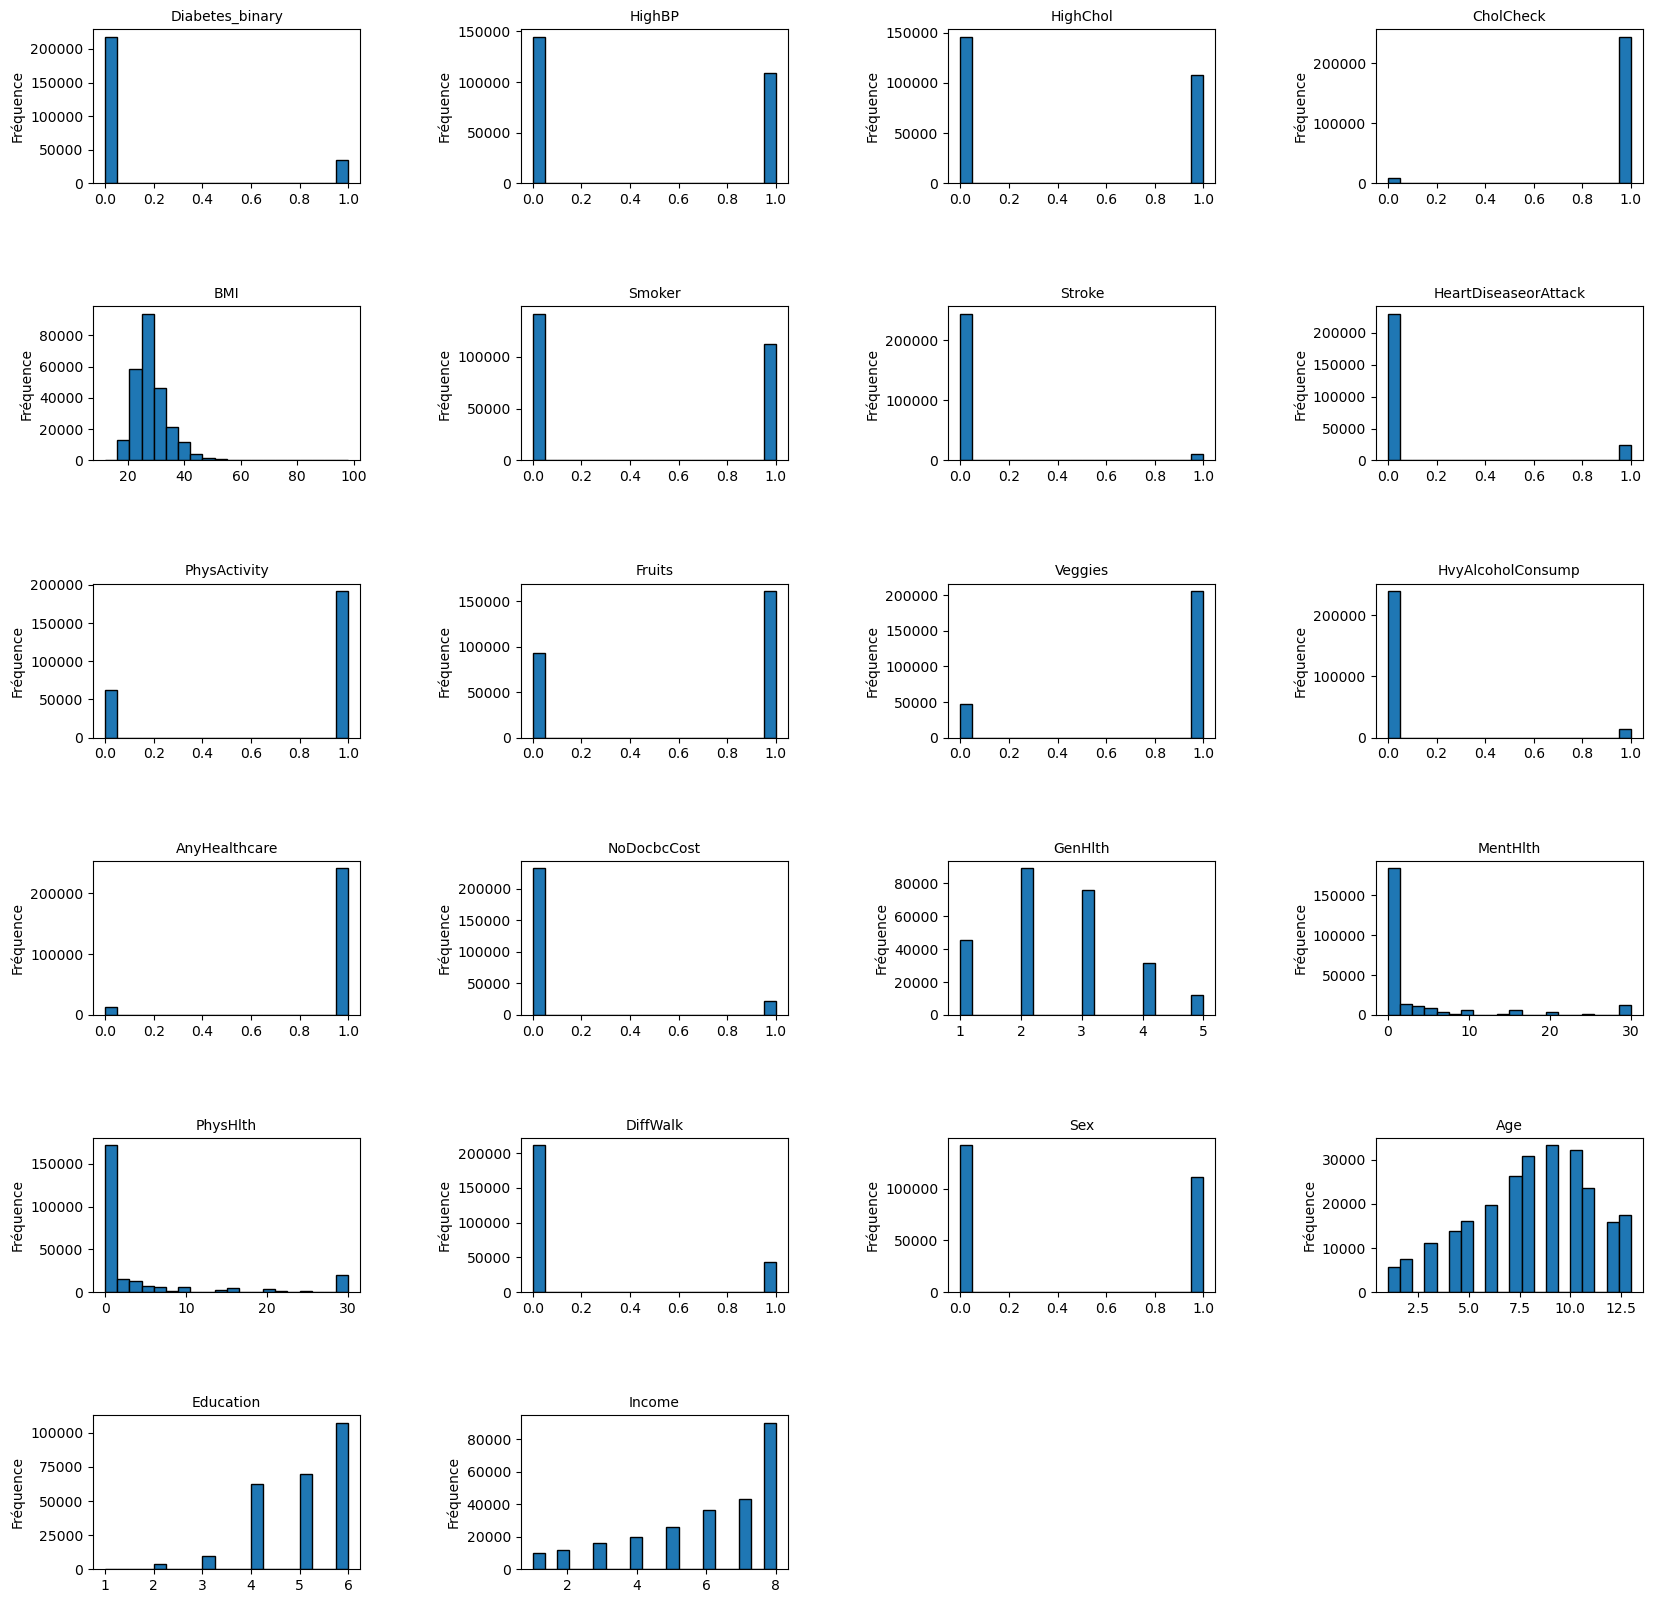

Le pourcentage de diabétique est de 13.933301797540206 %


In [2]:

## Chargement du dataset 
data_path = "../data/diabetes/diabetes_binary_health_indicators_BRFSS2015.csv"
df = analyze_diabetes_distribution(data_path)

### Premières observations

- Pas de **valeurs manquantes**  pas de complétion nécessaire ( ça on le savait déjà).  
- 22 colonnes, toutes de type **float**.  
- Pas de données bruitées visibles.  
- Environ **250 000 lignes**, ce qui en fait un jeu de données assez volumineux.  
- La proportion de diabétiques est d’environ **14 %**, ce qui montre un **déséquilibre** des classes.  
  donc Il faudra adapter la méthode d’entraînement (pondération, sur-échantillonnage, etc.).  
- On peut également observer certaines proportions via les histogrammes


## Etape 2 : L'analyse des features 

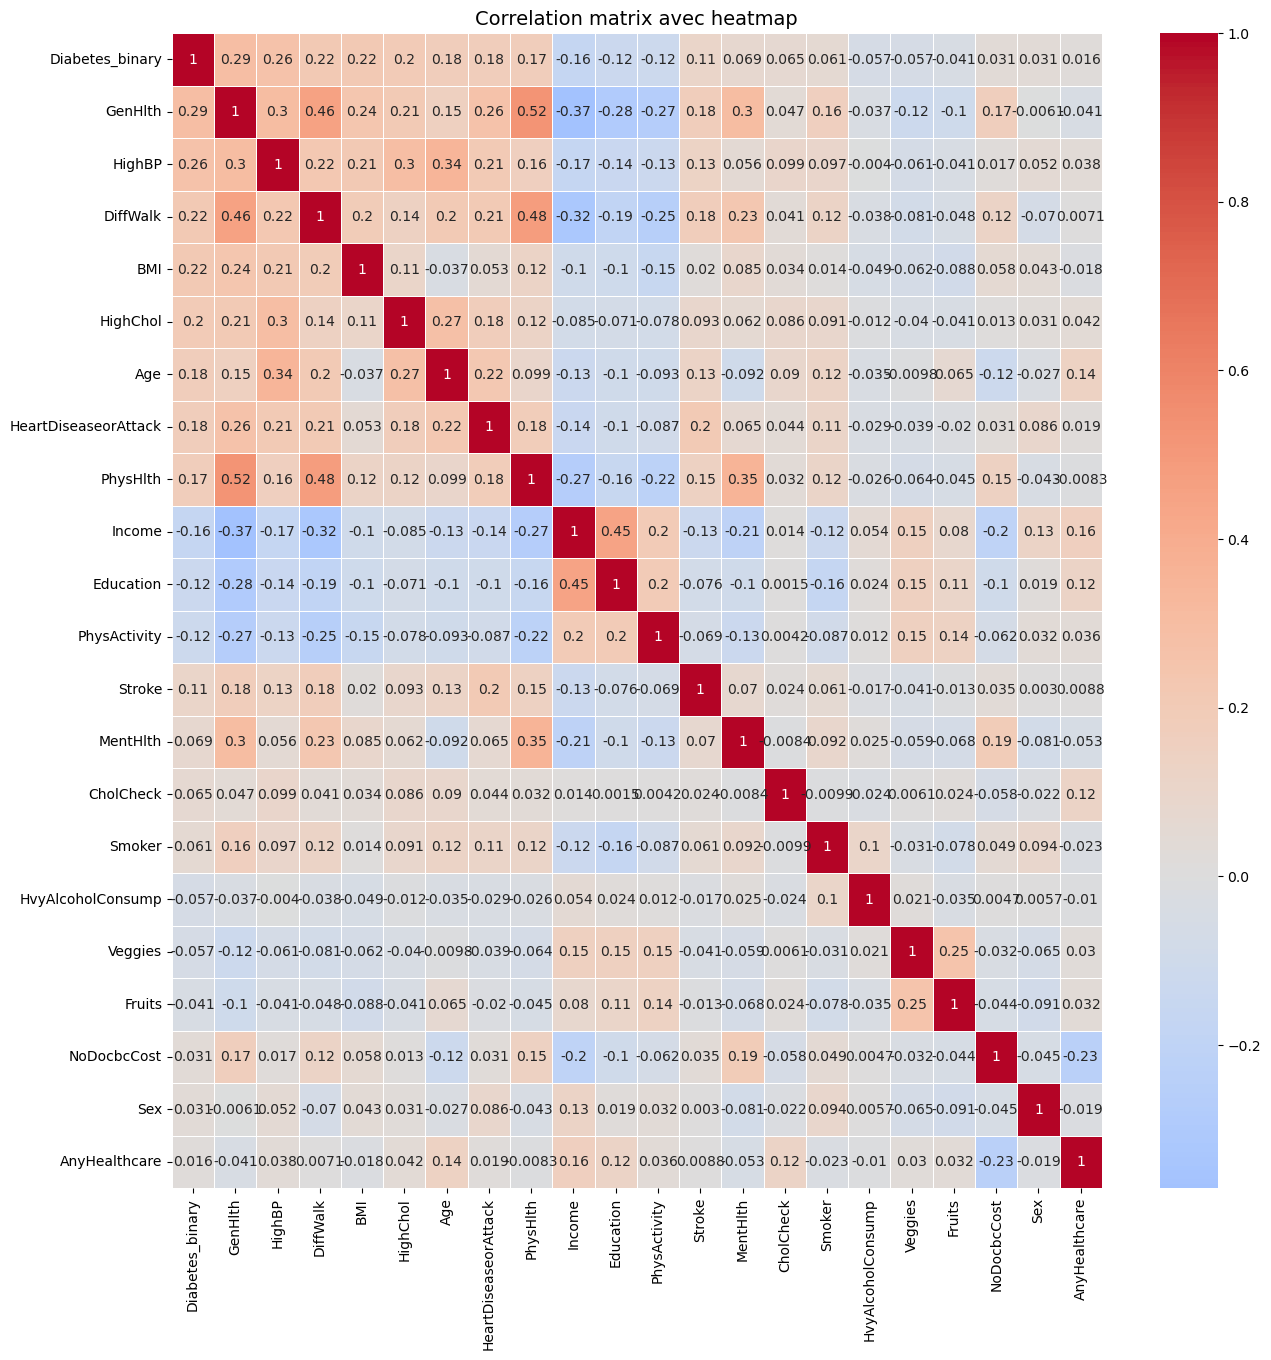

In [6]:
## matrice de corrélation des variables
plot_corr_matrix = plot_correlation_matrix(df)


La matrice de corrélation est de taille 22×22, on va donc se limiter aux 10 features les plus corrélées

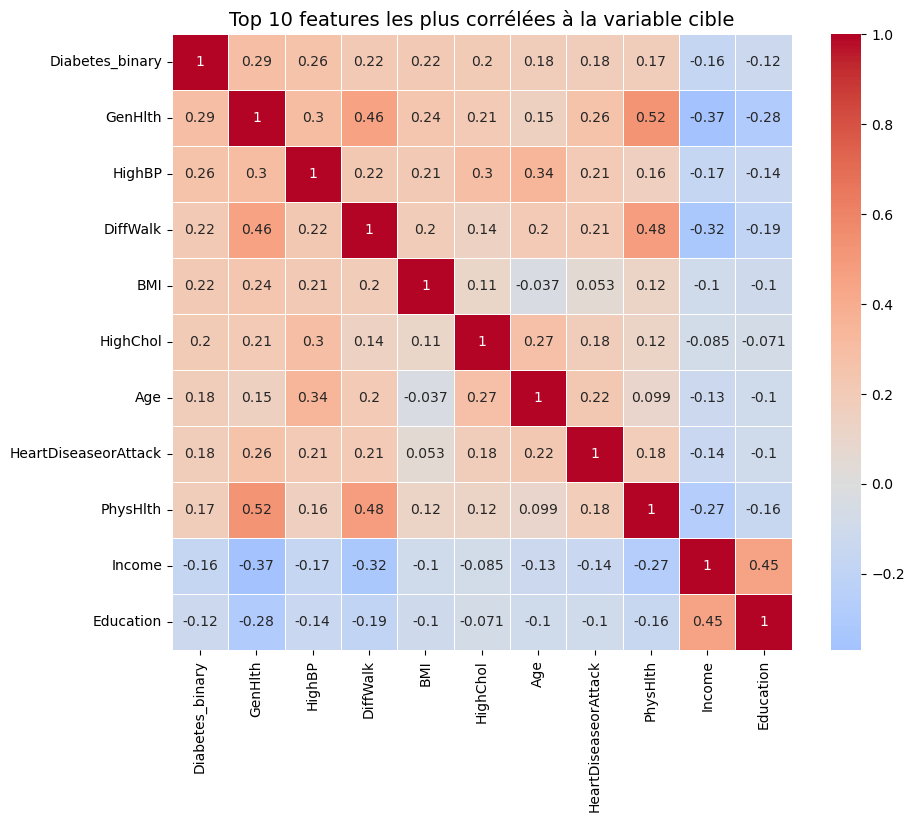

In [4]:
# affichage les 10 varaibles les plus corrélées
plot_corr_top10 = plot_top10_correlated(df)


### Commentaires : 

- La matrice de corrélation montre plusieurs dépendances fortes entre certaines variables (ex. HighBP et HeartDiseaseorAttack).
- Les 10 paires les plus corrélées indiquent une redondance possible entre certains indicateurs de santé.
- Ces observations orienteront la **sélection de features** et la **réduction de dimension** avant entraînement.


### Etape 3 : Reduction de dimension ( PCA ) 
On fait ça ici pour visualiser les data, et poursuivre l'étape précédente. En revanche elle sera éventuellement pour 
certains algorithmes 

 Données standardisées : Moyenne (approx) : 0.0 et écart-type (approx) : 1.0


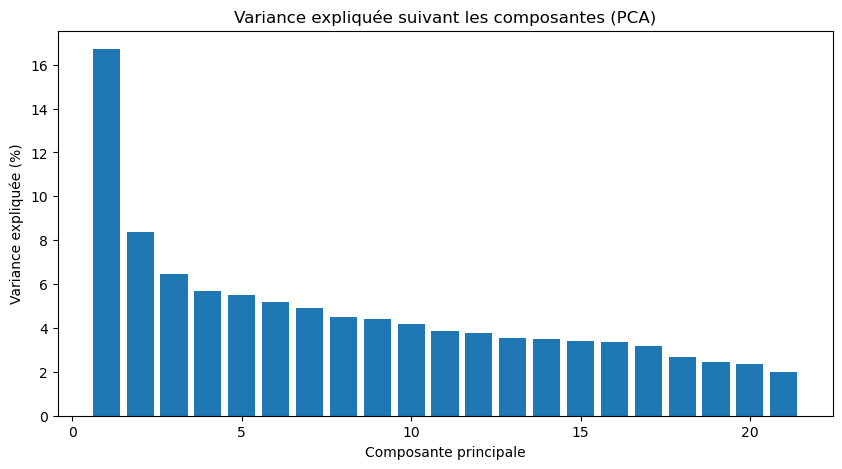

PC1 : 16.71%  |  PC2 : 8.40%
Variance cumulée (PC1+PC2) : 25.11%
PC1 : 16.71%  |  PC2 : 8.40%|  PC3 : 6.48%
Variance cumulée (PC1+PC2+PC3) : 31.59%


In [5]:
## Application de la PCA 

X_scaled, X_pca, explained_var, y = scale_and_pca(df)

## Commentaire :
###  On remarque qu'ici seule la première composante est prépondérante 
### les 3 composantes principales capturent ~32% de la variance des variables initiales : c'est peu.

In [6]:
## Plus globalement, fixons la variance à 90% et trouvons le nb optimal de dimensions

pca_90 = PCA(0.90)
X_reduced90 = pca_90.fit_transform(X_scaled)

print(f"Nombre de composantes retenues pour 95% de variance : {pca_90.n_components_}")
print(f"Nombre de features concervées  : {X_reduced90.shape[1]}")


## Si l'on veut concerver 95% de la variance 

pca_95 = PCA(0.95)
X_reduced95 = pca_95.fit_transform(X_scaled)

print(f" Nombre de composantes retenues pour 95% de variance : {pca_95.n_components_}")
print(f"Nombre de features concervées : {X_reduced95.shape[1]}")


Nombre de composantes retenues pour 95% de variance : 17
Nombre de features concervées  : 17
 Nombre de composantes retenues pour 95% de variance : 19
Nombre de features concervées : 19


### Résultats obtenus suite à la PCA : 

Pour expliquer 90% et respectivement 95% de la variance totale, la 
PCA retient 17 et 19 composantes principales selon les réglages effectués.
Autrement dit, la quasi-totalité des dimensions originales sont nécessaires 
pour préserver l’information statistique initiale. Finalement,
les variables du jeu de données sont faiblement redondantes, chacune apporte une contribution spécifique.
On pourrait réduire raisonnablement le nombre de variables de 1 ou 2 sans perdre 
trop d'information ( mais ça ne serait a priori un grand gain sur nos algos lors de l'étape d'entrainement ...)



### Préparation du jeu de donneés et split


In [3]:
X_train, X_test, y_train, y_test = split_data(
    df,
    target_column="Diabetes_binary",
    test_size=0.2,
    apply_pca=False      # ou True si PCA
)

Colonne cible utilisée : 'Diabetes_binary'
Split effectué : 202944 train / 50736 test


## Important :
### Ici, comme on souhaite détecter un maximum de potentiel malade, dans le compromis precison/recall on va se donner comme principal objectif la maximisation du recall, même si l'accuray et la précision sont faibles

### Entrainement du modèle utilisé sur les donneés de spam 

Testons les performances des modèles d'entrainement utilisé pour le dataSet de spam :

In [4]:
trained_models, results = train_models(X_train, X_test, y_train, y_test)
display(results)


Entraînement du modèle : RandomForest
RandomForest entraîné — Recall: 0.154 | F1: 0.231

Entraînement du modèle : KNN
KNN entraîné — Recall: 0.120 | F1: 0.191

Entraînement du modèle : NeuralNet
NeuralNet entraîné — Recall: 0.147 | F1: 0.233

Résumé des performances :
RandomForest → recall_score: 0.154 | F1: 0.231
KNN          → recall_score: 0.120 | F1: 0.191
NeuralNet    → recall_score: 0.147 | F1: 0.233


{'RandomForest': {'recall': 0.1543358325081341,
  'f1_score': 0.23129107483570066},
 'KNN': {'recall': 0.11981892771254775, 'f1_score': 0.1908732394366197},
 'NeuralNet': {'recall': 0.14726269627953034, 'f1_score': 0.23304231027535258}}

## Commentaire : 
### Les performances ainsi choisies donnent des résultats insatisfaisant... Ceci est probablment dû au caractère désequilibré du DataSet. Essayons donc d'obtenir de meilleurs hyperparamètres via GridSearchCV, afin d'obtenir une hausse des performances en particulier du recall. 

In [ ]:
#  grille de paramètres pour Random Forest
rf_param_grid = {
    'n_estimators': [500 ,700],
    'max_depth': [10, None],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [2, 4],
    'class_weight': ['balanced']
}

#  Grid Search
best_rf, best_rf_params, best_rf_score = grid_search_model(model=RandomForestClassifier(random_state=42),param_grid=rf_param_grid,X_train=X_train,y_train=y_train,scoring='f1',cv=3,n_jobs=-1)


Fitting 3 folds for each of 16 candidates, totalling 48 fits

Résultats du GridSearchCV :
Meilleurs paramètres : {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 700}
Meilleur score (f1) : 0.46262498834131865


In [ ]:
# Grille de paramètres pour KNN

knn_param_grid = {
    'n_neighbors': [5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid Search pour kNN

best_knn, best_knn_params, best_knn_score = grid_search_model(model=KNeighborsClassifier(),param_grid=knn_param_grid,X_train=X_train,y_train=y_train,scoring='f1', cv=3,n_jobs=-1)

# Grille de paramètres pour MLP

mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,),  (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [ 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Grid Search au MLP

best_mlp, best_mlp_params, best_mlp_score = grid_search_model(model=MLPClassifier(max_iter=1000, random_state=42),param_grid=mlp_param_grid,X_train=X_train,y_train=y_train,scoring='f1',cv=3,n_jobs=-1)

Fitting 3 folds for each of 12 candidates, totalling 36 fits

Résultats du GridSearchCV :
Meilleurs paramètres : {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Meilleur score (f1) : 0.2742647015559292
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Résultats du GridSearchCV :
Meilleurs paramètres : {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant'}
Meilleur score (f1) : 0.3191029423847454


### Conclusion partielle : 
On pourrait ainsi espérer améliorer le modèle d'entrainement. En revanche compte tenu de la taille du DataSet, effectuer une validation croisée
serait bien trop chronophage. On peut difficilement espérer une hausse du recall significative.
### Changeons légèrement notre approche :

## Entrainement des modèles et évaluation de nouveaux modèles
on choisit comme algorithmes de classification :
   -  Logistic regression 
   -  Random Forest 
   -  XGboost
Ce qui motive ce choix d'algos c'est le fait que ces algos sont dans leur principe assez différents, on peut espérer 
qu'ils fassent des erreurs assez différentes les uns des autres.
On souhaite par la suite faire du bagging et combiner les trois pour utilier 
de la classification par vote, c-à-d une stratégie d'ensemble déjà utiliser 
dans algo de Random Forest sur des arbres de décision. 
On espère ainsi avoir un recall encore meilleur ; voyons ça : 

La pipeline d'entrainement a été un peu ajustée, mais les paramètres ne sont pas optimaux, on règlera ça ensuite via GridSearchCV

Ici, comme on souhaite détecter un maximum de potentiel malade, dans le compromis precison/recall on va se 
donner comme principal objectif la maximisation du recall, même si l'accuray et la precision sont faibles


 

In [5]:
# entrainement

results_df, trained_models = train_and_evaluate_models(X_train, y_train, X_test, y_test, threshold=0.35)
t = trained_models
display(results_df)


,Accuracy,Precision,Recall,F1-score,ROC_AUC
XGBoost,0.406122,0.187371,0.977649,0.314472,0.822099
Voting (soft),0.500946,0.212519,0.954308,0.347624,0.824694
Random Forest,0.573538,0.235301,0.915971,0.374418,0.817652
Logistic Regression,0.626064,0.256555,0.887254,0.398020,0.819581


## Commentaire : 
#### - Le recall est vraiment très bon, on remarque dans le classificateur à vote souple que le taux de détection est nettement plus élevé que pour RandomForest et log-reg (XGboost doit aussi booster le score)
#### - Néanmoins l'Accuracy et la précision sont mauvais, mais le ROC_AUC reste plutot bon (voir la courbe ROC après). 

## Visualisation des matrices de confusion 


Logistic Regression


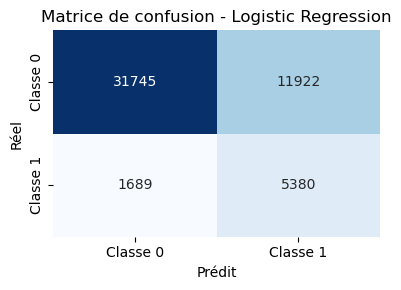


Random Forest


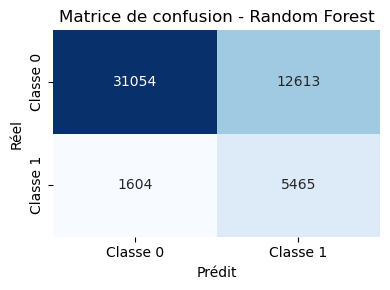


XGBoost


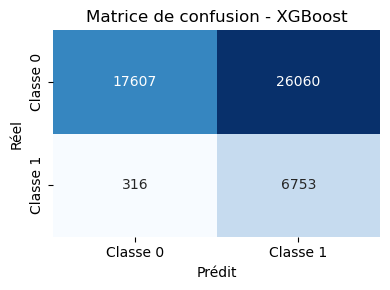


Voting (soft)


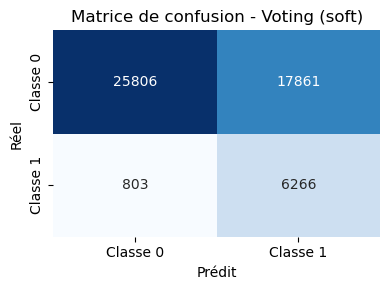

In [6]:
# affichage des résultats : matrice de confusion 
confusion_matrix = evaluate_models(t, X_test, y_test)


### Ajout des courbes ROC des modèles entrainés

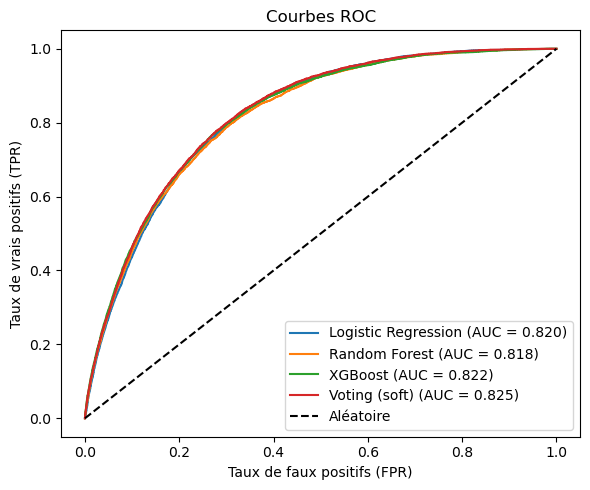

In [7]:
plot_roc_curves(trained_models, X_test, y_test)

### Commentaire :
 - Les trois modèles (Logistic Regression, Random Forest et Voting Classifier) ont des AUC très proches, autour de 0.82, ce qui indique une bonne capacité de discrimination.
 - XGBoost est un peu en retrait (AUC = 0.786) mais reste correct : il sépare moins bien les classes, probablement en raison du déséquilibre du dataset et du nombre réduit de features réellement informatives.
 - La diagonale (ligne pointillée) représente un classifieur aléatoire (AUC  = 0.5) . Tous nos modèles sont largement au-dessus , ils apprennent bien des patterns réels.
 - Nous avons fait le choix de ne pas utiliser GridSearchCV : compte tenu de la taille du DataSet ( comparé au précédent ) effectuer une telle recherche puis une validation croisée prendrait bcp de temps, par ailleurs les performances obtenues ne nous y contraint pas. 

### Features les plus importantes et conclusion finale

In [ ]:
## affichage du top10 features pour 3 classificateurs 
rf_model = trained_models["Random Forest"].named_steps["rf"]
select_features(rf_model, X_train, top_n=15)

xgb_model = trained_models["XGBoost"].named_steps["xgb"]
select_features(xgb_model, X_train, top_n=15)



Top 15 variables les plus importantes :
             Feature  Importance
             GenHlth    0.262510
              HighBP    0.238143
                 BMI    0.121572
            HighChol    0.108287
                 Age    0.089357
            DiffWalk    0.061781
HeartDiseaseorAttack    0.029769
              Income    0.027142
            PhysHlth    0.023475
        PhysActivity    0.007768
           Education    0.007186
   HvyAlcoholConsump    0.006196
           CholCheck    0.006018
              Stroke    0.003698
                 Sex    0.003061

Top 15 variables les plus importantes :
             Feature  Importance
              HighBP    0.335724
             GenHlth    0.186244
            HighChol    0.080319
                 Age    0.050824
           CholCheck    0.038746
            DiffWalk    0.037409
                 BMI    0.035655
HeartDiseaseorAttack    0.031603
   HvyAlcoholConsump    0.028724
                 Sex    0.028070
              Income    0.0

,Feature,Importance
0,HighBP,0.335724
1,GenHlth,0.186244
2,HighChol,0.080319
3,Age,0.050824
4,CholCheck,0.038746
5,DiffWalk,0.037409
6,BMI,0.035655
7,HeartDiseaseorAttack,0.031603
8,HvyAlcoholConsump,0.028724
9,Sex,0.028070


# Conclusion Finale : 

### L’analyse exploratoire et les modèles prédictifs appliqués au jeu de données BRFSS 2015 démontrent que les variables issues de l’enquête permettent effectivement de prédire avec une bonne précision si un individu est atteint de diabète ou présente un risque élevé.Les modèles Random Forest et XGBoost confirment tous deux une forte capacité discriminante, avec un rappel approchant les 90%, ce qui est essentiel d’un point de vue épidémiologique et préventif.

### Deux facteurs de risque ressortent systématiquement comme les plus déterminants :

###   - General Health

###   - High Blood Pressure

### À elles seules, ces deux variables contribuent à plus de 50 % de la décision dans les deux algorithmes testés. Plus largement, un noyau d’environ 8 à 10 variables suffit pour capturer près de 85 à 90 % du pouvoir prédictif global initialement obtenu avec les 21 variables.

### Ces résultats montrent donc qu’il est possible de réduire significativement le questionnaire BRFSS sans perte majeure de performance, ouvrant la voie à une version abrégée plus simple, plus rapide et potentiellement mieux adaptée à un usage clinique ou de dépistage à grande échelle.

### En résumé, l’étude confirme :

###  - la capacité prédictive élevée des données BRFSS,

###  - l’existence d’un sous-ensemble réduit de facteurs de risque très informatifs ( une dizaine )

###  - la faisabilité d’un questionnaire simplifié, performant et utilisable en pratique.